 Welcome to a project I really wanted to try out. This is mainly something I wanted to do in order to really test myself on the skills I have been learning thoughout the past few months, so I wanted to do this with a topic I have been very intersting in for a long time, video games. The main thing a wanted to look into as its alwas a topic of discussion is the rating of video games through the lens of video game jornalists and typical customers. 

 Beforehand, into the 90's up until the early 00's, if you wanted to figure out if a game you wanted to buy was good, you either rely on your friends if they had it, or just figure it out yourself. Now, there a whole slew of websites you can find to make your own option, with one of the biggest being Metacritic, a site for rating movies and tv shows, and especially video games. Here you can look for a specific game and not only see how many video game jornalists felt about it, but also people that bought the game for themselves. 

 Athough this has made looking for games more convient, once in a while there is always a game that comes out that is raved by critics, but is felt diffrently by the gerenral public and likewise. Also, once in a while, I might hear or see that critic review dont really signify how the public might see aboutit, which again has examples. This obviously makes sense, as critics and users are playing these games under diffrent mindsets, one side is playing the game because its their job to, and the other out of their own enjoyment. One has a limited time to put out a review before the game launches or the embargo lifts,depending on when they get a review copy, and the other has all the time in the world. However, I wanted to see how big that discrepancy can be, and premise is what made what to see what the data would show if a dug into it. 

 This ended up turning a entire process of comparing games scores between crits and users, calcualting the descrepancies between them, and also seeing how average games scores change thoughout the years 

In [1]:
import numpy as np 
import pandas as pd 

For the data set, I am using a Metacritic dataframe that contains most games on the site along with their ratings, plaform,release date, developer(s), genre(s), along with how many critics and users rated the game. As many games come out of multiple platforms, many games will shopw up more than once, but will have diffrent rating, as Metacritc does separate rating for each platform the game is on. 
* Ex. On row 3 and 5, Grand Theft Auto 5 shows up, however the platforms are different and have different user scores

In [2]:
game_scores = pd.read_csv('/kaggle/input/metacritic-videogames-data/games-data.csv')
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,9.1,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,7.4,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,7.6,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,8.5,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,7.9,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


## EDA

By using the shape attibute, we can see how many rows and columns the dataframe contains. This dataframe has 17944 rows, meaning 17944 games, and 10 columns. 

In [3]:
game_scores.shape

(17944, 10)

Using the columns attirbute will show all 10 columns names.

In [4]:
game_scores.columns

Index(['name', 'platform', 'r-date', 'score', 'user score', 'developer',
       'genre', 'players', 'critics', 'users'],
      dtype='object')

Using the info() function gives a summary of the dataframe, including the columns names, the amount of values that are not null or empty, and most importantly the type of each column. This is most helpful in order to check if the types are as they are supposed to be or if they have to be changed. 

In [5]:
game_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        17944 non-null  object
 1   platform    17944 non-null  object
 2   r-date      17944 non-null  object
 3   score       17944 non-null  int64 
 4   user score  17944 non-null  object
 5   developer   17944 non-null  object
 6   genre       17944 non-null  object
 7   players     17922 non-null  object
 8   critics     17944 non-null  int64 
 9   users       17944 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.4+ MB


Based on the summary, the only columns that needs to be changed is the user score, as it is an object instead of an interger. It will need to be an interger in order to compare it with the critic score.

The conversion would also be helpful in order to see the distributions of the scores, which won't be shown since it is not in a numerical format. For example, when calling the describe function, which is used to show basic statistical details about each column, the user score will not show.(By using the parameter 'include' and setting it to all, all columns will show up, just with limited information.)

In [6]:
game_scores.describe(include='all')

,name,platform,r-date,score,user score,developer,genre,players,critics,users
count,17944,17944,17944,17944.000000,17944,17944,17944,17922,17944.000000,17944.000000
unique,11762,22,4357,NaN,95,4253,2042,55,NaN,NaN
top,Madden NFL 07,PC,"November 14, 2006",NaN,tbd,Capcom,"Action,Platformer,2D",No Online Multiplayer,NaN,NaN
freq,9,4592,48,NaN,1286,298,529,4792,NaN,NaN
mean,NaN,NaN,NaN,70.386647,NaN,NaN,NaN,NaN,23.149799,172.797983
std,NaN,NaN,NaN,12.410885,NaN,NaN,NaN,NaN,17.152985,1280.291974
min,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,11.000000,11.000000
50%,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,17.000000,28.000000
75%,NaN,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,30.000000,90.000000


Before changing the dataframe dtypes, it would helpful to see if there were any missing values in any of the columns thast might make the processing harder than it needs to be. By using 'isnull()', it will check if any columns have any null values, and by using the 'sum()' function alongside it, it will count the amount of null values in each column.

In [7]:
# first check of null values 
game_scores.isnull().sum()

name           0
platform       0
r-date         0
score          0
user score     0
developer      0
genre          0
players       22
critics        0
users          0
dtype: int64

Well, it says that only the players column, which shows if the game has 1 players, cooperative, and or multiplayer, has missing values, but it seems that the user score might have some string thats substituing for an empty score, which would not show in the above line. In fact, in the describe function above, the value that had the highest frequency was 'tbd', which would prevent the column to be chaged to a interger. So, the why to get around is this is by changing the tbd value to NaN. 

With the replace function, the tbd value can be replaced with Nan using numpy. Then, by using the same 'isnull().sum()' combination with the user score column, the actual amount of null values will be showed. 

In [8]:
#replaceing tbd with NaN, since trying to convert user score to in gave an error
game_scores['user score'].replace('tbd', np.nan, inplace = True)

#checking howe many null values. Will not modify, important to keep for analysis sake.
game_scores['user score'].isnull().sum()

1286

Here, it is shown that there are actually 1286 missing. Here there are two options, either drop the columns that have null values or just leave them. At first, I decided to keep them, as I though that the critic scores along with the other information such as the release date whould be important still. However, I decided to remove those rows to the make the later comparions more fair, and also with the amount of games, 1286 rows removed would not change much.

In [9]:
game_scores.dropna(subset=['user score'], axis=0, inplace=True)

After this, I was finally able to change the user score columns from an object to an interger, making it possible to compare the critic and user score. By using the 'astype' function and multplying it by 10 to make it more comparable to the critic score, the values were changed to the proper format.

In [10]:
#changing score from object to float, them multiplying by 10 to match the meta score
game_scores['user score'] = game_scores['user score'].astype('float') * 10
game_scores['user score'] = game_scores['user score'].astype('int')

In [11]:
game_scores.head()

,name,platform,r-date,score,user score,developer,genre,players,critics,users
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85,Namco,"Action,Fighting,3D",1-2,24,324
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364


Here when checking the dtype, we can see that it was successfully changed to type int64.

In [12]:
game_scores['user score'].dtype

dtype('int64')

## Data Formatting
Here, I wanted the change the formatting of the dataset it make it a bit easier and understandable. Here I changed columns names as well as added new features I felt would be beneficial to the project.

The first order of business was chaging the column names to something more understandable. 'score', was changed to 'critic score', to make it more obvious that the column was for critic scores, as well as 'critics' and 'users to 'critics amount' and 'user amount', to show that these columns are for the amount of those who rating said games.

In [13]:
#renaming the columns to be more understandable
game_scores.rename(columns={'score':'critic score', 'critics':'critics amount', 'users':'users amount'}, inplace=True)
game_scores.columns

Index(['name', 'platform', 'r-date', 'critic score', 'user score', 'developer',
       'genre', 'players', 'critics amount', 'users amount'],
      dtype='object')

The next step, which I thought would be the most important, was to make a new column for the percent difference between the critic and user score, which is calculated by taking the absolute value of the critic subtracted by the user score then dividing it by the critic plus the user score, then multplying the entire thing by 100. This waw then added as a new column in the dataframe that shows the discrepancy percentage of each game.

In [14]:
## percent diffrence between critic score and user score
game_scores['percent_difference'] = abs(game_scores['critic score'] - game_scores['user score']) \
                                    / ((game_scores['critic score'] + game_scores['user score'])/2) * 100
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference
0,The Legend of Zelda: Ocarina of Time,Nintendo64,"November 23, 1998",99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977
2,Grand Theft Auto IV,PlayStation3,"April 29, 2008",98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356
3,SoulCalibur,Dreamcast,"September 8, 1999",98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650
4,Grand Theft Auto IV,Xbox360,"April 29, 2008",98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927


Here I wanted to check how many games each platform had out of curiosity and to see if this could be helpful for any later analysis.

In [15]:
#checking the pltforms that are imcluded in the list. do not include stadia(too little), PS5, XSX(too recent of this dataset.)
game_scores['platform'].value_counts()

PC                 4436
PlayStation4       1852
Xbox360            1593
PlayStation2       1302
PlayStation3       1232
XboxOne            1021
Switch             1004
Xbox                659
Wii                 605
DS                  569
PSP                 460
GameCube            411
3DS                 386
GameBoyAdvance      336
PlayStationVita     253
WiiU                185
PlayStation         160
Dreamcast           121
Nintendo64           70
Stadia                3
Name: platform, dtype: int64

Since there is a column that shows when a game released, it would be helpful for analysis if it was switched to the datetime format of yyyy/mm/dd, which is more used. In order to do this, all it took was to use the the pandas 'to_datetime' function and use the release year column for conversion. What comes out is a converted format that is more helpful.

As an extra, I also decided to make a separate column exclusively for the year, as the months and days aren't as important except for the measurements over time. This was done by using the pandas 'DatetimeIndex' function and specifying the year portion. 

I also decided to add a score range column in addition to the percent difference to show the actual number differnce between the critic and user score. I did this since the percent diffrence may not properly show the difference betweeen the two numbers.

In [16]:
game_scores['score_range'] = abs(game_scores['critic score'] - game_scores['user score'])

In [17]:
# converting the release date to a more easier to work with datetime format.
game_scores['r-date'] = pd.to_datetime(game_scores['r-date'])
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,score_range
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053,8
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977,24
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356,22
3,SoulCalibur,Dreamcast,1999-09-08,98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650,13
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927,19


In [18]:
## creating a column for just the year
game_scores['r-year'] = pd.DatetimeIndex(game_scores['r-date']).year
game_scores.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,score_range,r-year
0,The Legend of Zelda: Ocarina of Time,Nintendo64,1998-11-23,99,91,Nintendo,"Action Adventure,Fantasy",1 Player,22,5749,8.421053,8,1998
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,98,74,NeversoftEntertainment,"Sports,Alternative,Skateboarding",1-2,19,647,27.906977,24,2000
2,Grand Theft Auto IV,PlayStation3,2008-04-29,98,76,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,64,3806,25.287356,22,2008
3,SoulCalibur,Dreamcast,1999-09-08,98,85,Namco,"Action,Fighting,3D",1-2,24,324,14.207650,13,1999
4,Grand Theft Auto IV,Xbox360,2008-04-29,98,79,RockstarNorth,"Action Adventure,Modern,Modern,Open-World",1 Player,86,3364,21.468927,19,2008


With all the major data formatiing done for now, lets use the describe function again to see some of the basic statistics so we can get some early insights of the data.

In [19]:
game_scores.describe()

,critic score,user score,critics amount,users amount,percent_difference,score_range,r-year
count,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000,16658.000000
mean,70.964702,69.886061,24.025753,186.137351,14.363828,9.207948,2010.802797
std,12.385077,13.610182,17.425370,1327.860899,15.929651,8.611817,5.870484
min,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1995.000000
25%,64.000000,63.000000,11.000000,14.000000,4.081633,3.000000,2006.000000
50%,73.000000,73.000000,18.000000,33.000000,9.523810,7.000000,2011.000000
75%,80.000000,79.000000,31.000000,100.000000,18.867925,13.000000,2016.000000
max,99.000000,98.000000,126.000000,146262.000000,187.692308,74.000000,2020.000000


Since the user score was turned into an interger, it now shows up in the table without using the include all parameter. 

Fisrt of all, when looking at the critic and user scores, it doesn't really seem all that diffrent; the mean, and most of the percentiles look about the same, except for the minimum, which is 11 for
critics, but 2 for users. Despite this, we can't really determine that much for now.

In terms of the percent difference, the average diffrence seems it be around 14%. The most interesting value, however, is the maximum value which comes to around 188%, which could be a huge difference depending of the range of the two numbers. For example 188% could be the difference between 90 and 3 or between 9 and 0.3, so further analysis will have to be done

For the release year, the earliest record is in 1995, with the latest being in 2020.

To make things a little bit easier, I decided to make different datasets, sorted by the user score percent difference, and range. By using the sort_values function, I could specify which column I wanted to sort by and by which order. Both were sorted in decending order and, just in case, I showed the first five rows of the dataframe sorted by user score to see what the first games were and they are completly diffrent than what the critic scores were. What was even more surprising was that in all five games, what the users though as acclaimed, the critics rated as mostly mixed. This shows a bit of disagreement, which is also apparent in the percent differences.

In [20]:
# making a separate dataframe with data sorted by user score and percent difference
game_scores_user = game_scores.sort_values(['user score'], ascending=False, axis=0)
game_difference = game_scores.sort_values(['percent_difference'],  ascending=False, axis=0)
game_range = game_scores.sort_values(['score_range'],  ascending=False, axis=0)
game_scores_user.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,score_range,r-year
4565,GrimGrimoire,PlayStation2,2007-06-26,79,98,VanillaWare,"Strategy,Real-Time,Fantasy",1 Player,39,2314,21.468927,19,2007
4664,Rochard,PlayStation3,2011-09-27,79,97,RecoilGames,"Action,Adventure,General,General,Platformer,2D",No info,34,465,20.454545,18,2011
10265,Tengami,WiiU,2014-11-13,70,97,Nyamyam,"Adventure,General",No info,15,675,32.335329,27,2014
10608,Diaries of a Spaceport Janitor,PC,2016-09-16,69,97,SundaeMonth,"Simulation,Virtual,Career",No Online Multiplayer,7,2495,33.734940,28,2016
8967,After Burner Climax,Xbox360,2010-04-21,72,97,SegaAM2,"Simulation,Flight,Modern Jet,Modern Jet,Combat",No info,31,579,29.585799,25,2010


Already, some diffrences can be seen. Completly different games.

The same was done for the percent diffrence, and yeahhh, that 187% we saw previously did have a pretty big range. It would seem that the critcs and users really didn't agree with neither the Playstation 4 or Xbox One versions of Madden NFL 21, with a range of 61and 65 respectivly, and the percent diffrence of 188% and 178%. The other noticable observation is that in the release year column, all five games came out in 2020, which was the latest year as of this dataframe.

In [21]:
# wow just from the first five rows.... 
game_difference.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,score_range,r-year
13665,Madden NFL 21,PlayStation4,2020-08-25,63,2,EASports,"Sports,Team,Football,Sim",Up to 6,29,5363,187.692308,61,2020
10570,Madden NFL 21,XboxOne,2020-08-25,69,4,EASports,"Sports,Team,Football,Sim",Up to 6,20,994,178.082192,65,2020
4964,Tom Clancy's The Division 2: Warlords of New York,PC,2020-03-03,79,5,MassiveEntertainment,"Action,Shooter,Third-Person,Tactical",No info,19,1498,176.190476,74,2020
14808,Warcraft III: Reforged,PC,2020-01-28,59,6,BlizzardEntertainment,"Strategy,Real-Time,General",Online Multiplayer,46,30532,163.076923,53,2020
11173,NBA 2K21,PlayStation4,2020-09-04,68,7,VisualConcepts,"Sports,Team,Basketball,Arcade",Up to 10,49,446,162.666667,61,2020


The same was done for the game ranges, and one of the games also showed up here from the percent diffrence dataframe. With ranges in the 70s and 60s, the critics and users had completely different mindsets when rating these games.

In [22]:
game_range.head()

,name,platform,r-date,critic score,user score,developer,genre,players,critics amount,users amount,percent_difference,score_range,r-year
4964,Tom Clancy's The Division 2: Warlords of New York,PC,2020-03-03,79,5,MassiveEntertainment,"Action,Shooter,Third-Person,Tactical",No info,19,1498,176.190476,74,2020
3126,Tom Clancy's The Division 2: Warlords of New York,XboxOne,2020-03-03,82,11,MassiveEntertainment,"Action,Shooter,Third-Person,Tactical",No info,9,172,152.688172,71,2020
1802,NBA 2K18,XboxOne,2017-09-15,85,16,2KGames,"Sports,Team,Basketball,Sim",Up to 10,16,178,136.633663,69,2017
4911,FIFA 20,PlayStation4,2019-09-24,79,12,ElectronicArts,"Sports,Team,Soccer,Sim",Up to 22,62,3420,147.252747,67,2019
5780,FIFA 21,XboxOne,2020-10-06,77,11,ElectronicArts,"Sports,Team,Soccer,Sim",Up to 22,18,229,150.000000,66,2020


With most of that out of the way, its time to start plotting in order perform further analysis on the data. This will be done with matplotlib along with seaborn, which are both plotting libraries, so it will be necessary to import them. 

In [23]:
#importing the needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

First of all, the first thing I wanted to see was a boxplot of the user scores and critic scores, in order to compare the percentiles of the two. We already saw the percentiles with the describe function that was used before, however, visualizing it may show something that wasn't visible with the numbers alone. One thing that these boxplots would show that the numbers wouldn't are the possible outliers in the data, which would signify scores that are way off from the typically ranges. 

By using matplotlib, a boxplot was made using the columns of critic and user scores next to each other in order to compare the two.

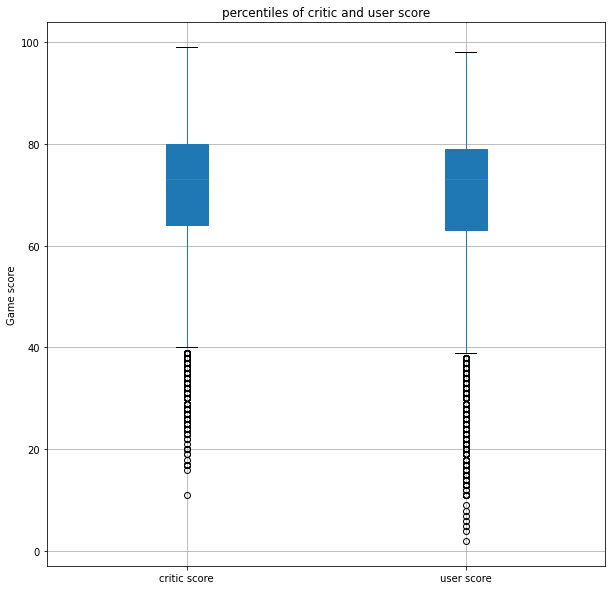

In [24]:
# boxplot of critic and user score
boxes = game_scores.boxplot(['critic score', 'user score'], figsize=(10,10),patch_artist=True)
plt.title('percentiles of critic and user score')
plt.ylabel('Game score')
plt.show()

Looking at the boxplots, there doesn't seem that much diffrences between the percentiles or the min and max vaules. The two are not exactly identitcal, but they are close enough that nothing can really be concluded between the two. However, the major difference between the two are the outliers, which both had many of. This means that there are a lot of games that users and critics though were really unsatisfactory. One intersting thing though,is that the user score has a larger range of outliers,reaching all the way to what looks like around 3, while for critics the score only reaches to around 11. 

So, it seems that there are games that users rated lower than what critics rated it as.

Now its time to do the same thing for the percent differences and, which will be done in the same way.

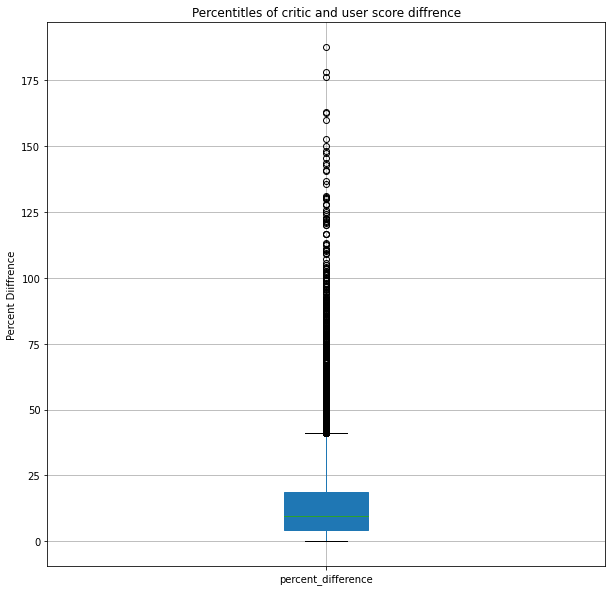

In [25]:
# boxplot of percent difference
box = game_scores.boxplot(['percent_difference'], figsize=(10,10),patch_artist=True)
plt.title('Percentitles of critic and user score diffrence')
plt.ylabel('Percent Diiffrence')
plt.show()

##### Wow, those are a lot of outliers
The thing about percent diffrence is that it is relative to the larger value, which means that 90 and 3 or 9 and 0.3 would give the same percent. That means that the percent may be huge, but the range between the two may not be that big. However, it is still significant to show the diffrence between the two numbers. Based on the plot, although the accepted max is around the 40s(calculated by), there are many values that pass it, enough that the individual points are not visible and is just a black line.

Judging by the plot, it seems like most of the outliers are between the 40s to around 100s meaning that some of those values could be very huge between the critic and user scores.

Here a regression plot was done to see the correlations between the critic and user scores. If there is a good correlation between the two, as the critic score goes up, the user score should also go up, and with the points as close as to each other. Depending on the points, a correlation line should also show the relationship between the two, whether positive, negative, or none at all. To create this plot, seaborn was used with its regplot function, making it possible to plot the user scores against the critic scores.

<AxesSubplot:xlabel='user score', ylabel='critic score'>

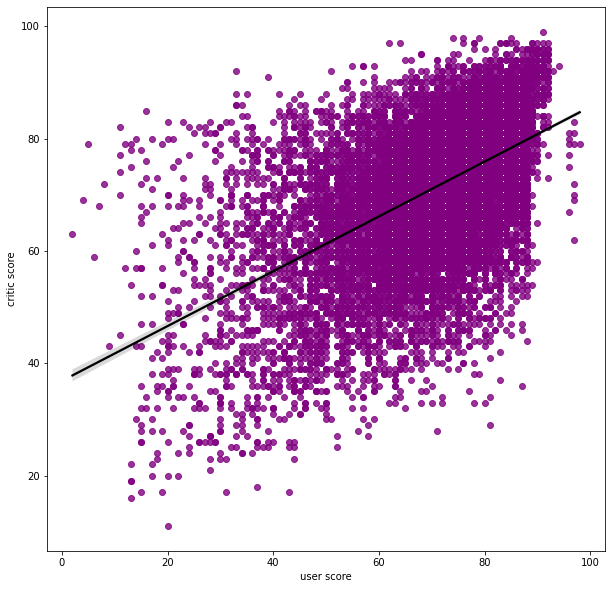

In [26]:
#regression plot to see if there is a correlation between user and critic scores
plt.figure(figsize=(10,10))
sns.regplot(x='user score', y='critic score', data=game_scores, color='purple', line_kws={'color':'black'})

According to the plot, there does seem to be a positive overall relationship between the two scores, according to the regression line. As the user score goes up, the critic score does also increase, with points staying reletively close to each other. However, there does seem to be a difference between the points in the lower user score range compared to the higher one. In the higer portions of the scores, the points are pretty close together, which shows linearity between the critic and user scores. However, as the user scores decrease, the points seem to become more scattered until the 20 mark, which shows points all over, showing less of an agreement between the two scores. 

Based on this, it could seem that in the higher ratings, critics and users do seem to agree a bit, but seem to have different opinions lower than that area.

The next step was making a bar plot, showing the top 50 games for both critics and users. Based on the first 5 rows of dataframes sorted by critic and user scores, there were no matching games, so it would interesting to see what games critics and users saw as the best. The first part in doing this was getting the first 50 rows of the games and their scores using the 'head' function and specifying the amount of rows needed for both dataframes. Then, by using seaborns barplot function, a barplot was made showing the 50 top games for critics and users. A horizontal barplot was used instead of a vertical one to make the plot understandable.

In [27]:
critics_top_name = game_scores['name'].head(50)
critics_top_score = game_scores['critic score'].head(50)
user_top_name = game_scores_user['name'].head(50)
user_top_score = game_scores_user['user score'].head(50)

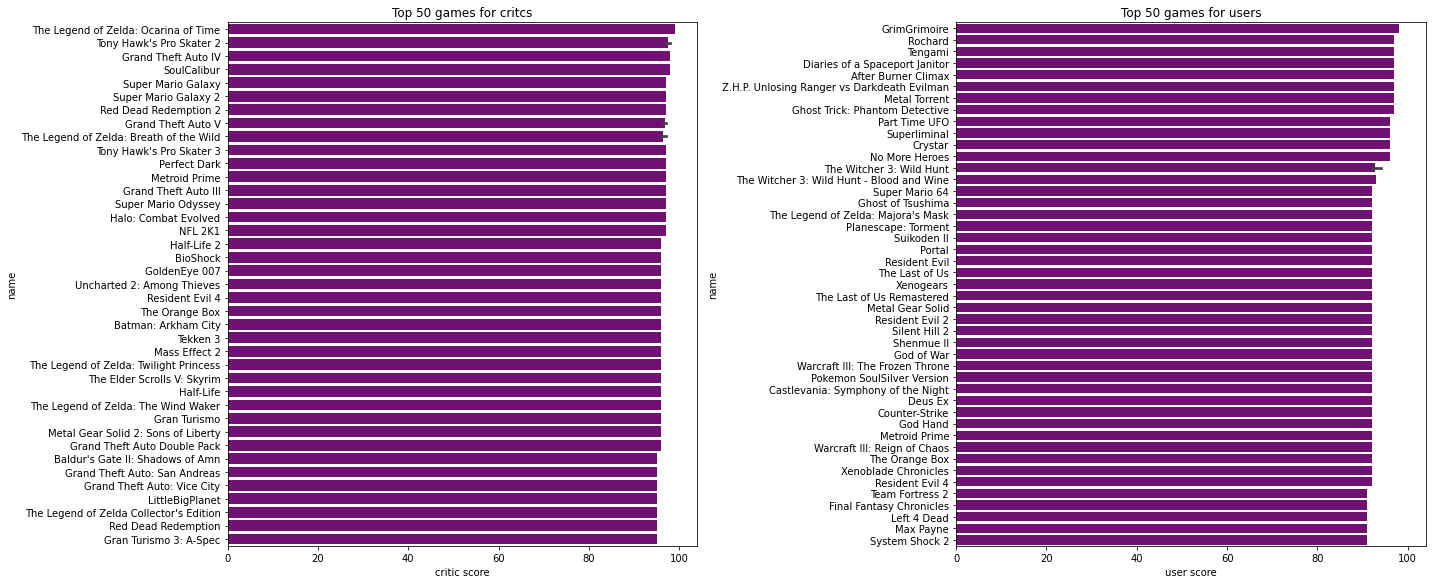

In [28]:
#showing top 50 games for critics and users
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(20,8))
sns.barplot(y=critics_top_name,x=critics_top_score, ax=ax1, color='purple')
sns.barplot(y=user_top_name,x=user_top_score,color='purple', ax=ax2)
fig.tight_layout()
ax1.set_title('Top 50 games for critcs')
ax2.set_title('Top 50 games for users')
plt.show()

Similar to the to what was shown before, the top games for critics almost entirely do not match for user scores. The only two games that are in both plots are 'The Orange Box', a compilation games such as *Half Life 2* and its two other episodes, *Team Fortress 2*, and *Portal*, popular games developed by Valve, and *Resident Evil 4*, a horror game by Capcom. 

Other than those games, there seems to be no other similarites between the two.

Time to do the same for the percent and range diffrences. From the first 5 rows of the dataframe and the box plot, there seems to be many games that have a large difference between critic and user scores. With the bar plot for percent and range difference, the first 50 games will be shown. 

In [29]:
#most of these games came out in the past few years, percent differrences
difference_name = game_difference['name'].head(50)
difference_percent = game_difference['percent_difference'].head(50)
range_name = game_range['name'].head(50)
difference_range = game_range['score_range'].head(50)

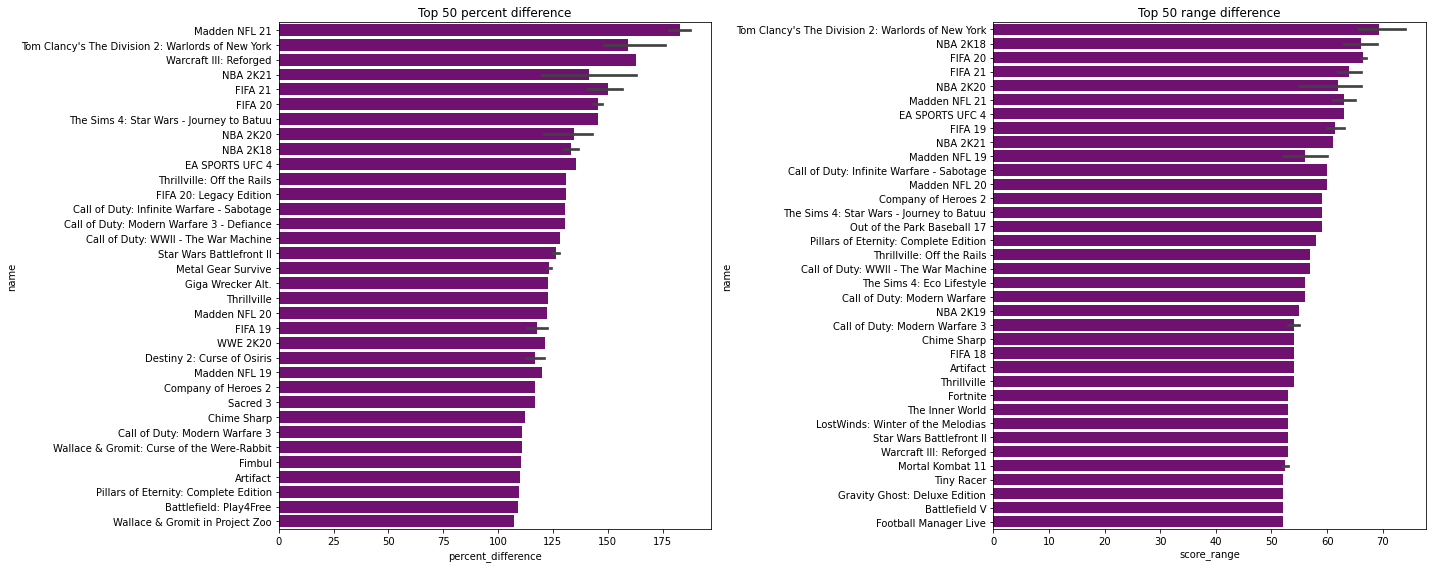

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=difference_name, x=difference_percent,color='purple', ax=ax1)
sns.barplot(y=range_name, x=difference_range,color='purple', ax=ax2)
ax1.set_title('Top 50 percent difference')
ax2.set_title('Top 50 range difference')
fig.tight_layout()
plt.show()

All the games listed have a percent diffrence over 100%, which means that which these games, the difference between the two scores are more than double. 

Next was showing the distributions for the scores by using histogram plots of both critic and user scores. With this, the freqency of how many times a certain range of values were used as a score was shown. This is helpful to see if there was any range that was used less or more in relation to the other.  

By using season's histplot, histograms were created that shows the distributions of critic and user scores.

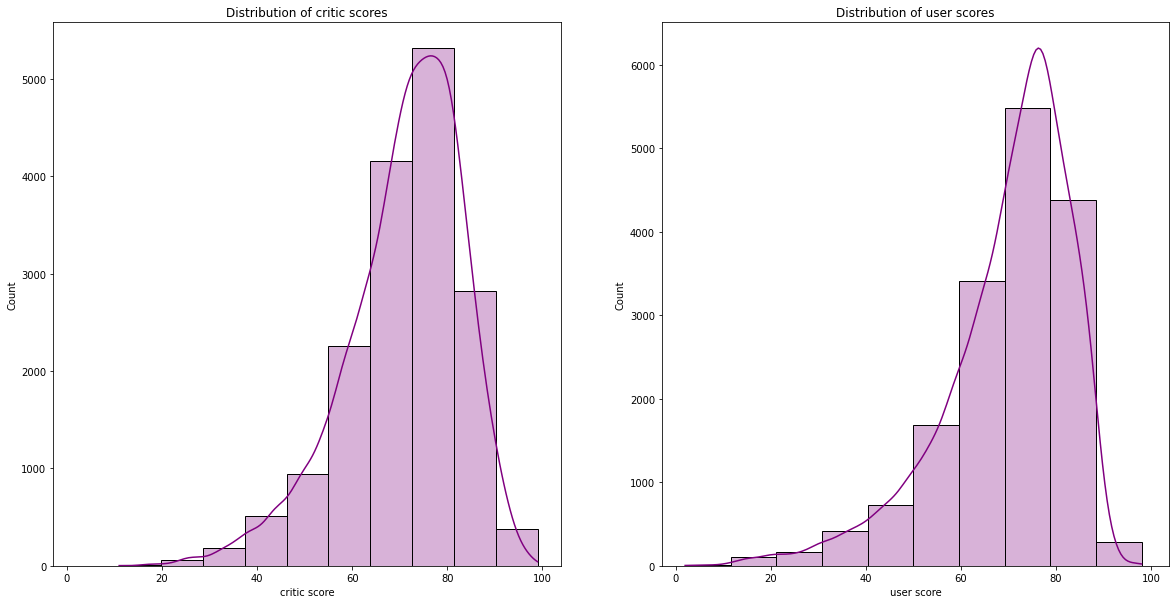

In [31]:
#histogram distributions of critic and user scores
fig, axes = plt.subplots(1,2, sharex=True, figsize=(20,10))
sns.histplot(data=game_scores, x='critic score', ax=axes[0], bins=10,kde=True, alpha=0.30, color='purple')
axes[0].set_title('Distribution of critic scores')
sns.histplot(data=game_scores, x='user score', ax=axes[1], bins=10,kde=True, alpha=0.30, color='purple')
axes[1].set_title('Distribution of user scores')
plt.show()

Looking at the plots, they both seems pretty similar, with the kde line looking almost similar although being a bit more narrow on the user score plot.

Time for the same except for the percent and range difference. 

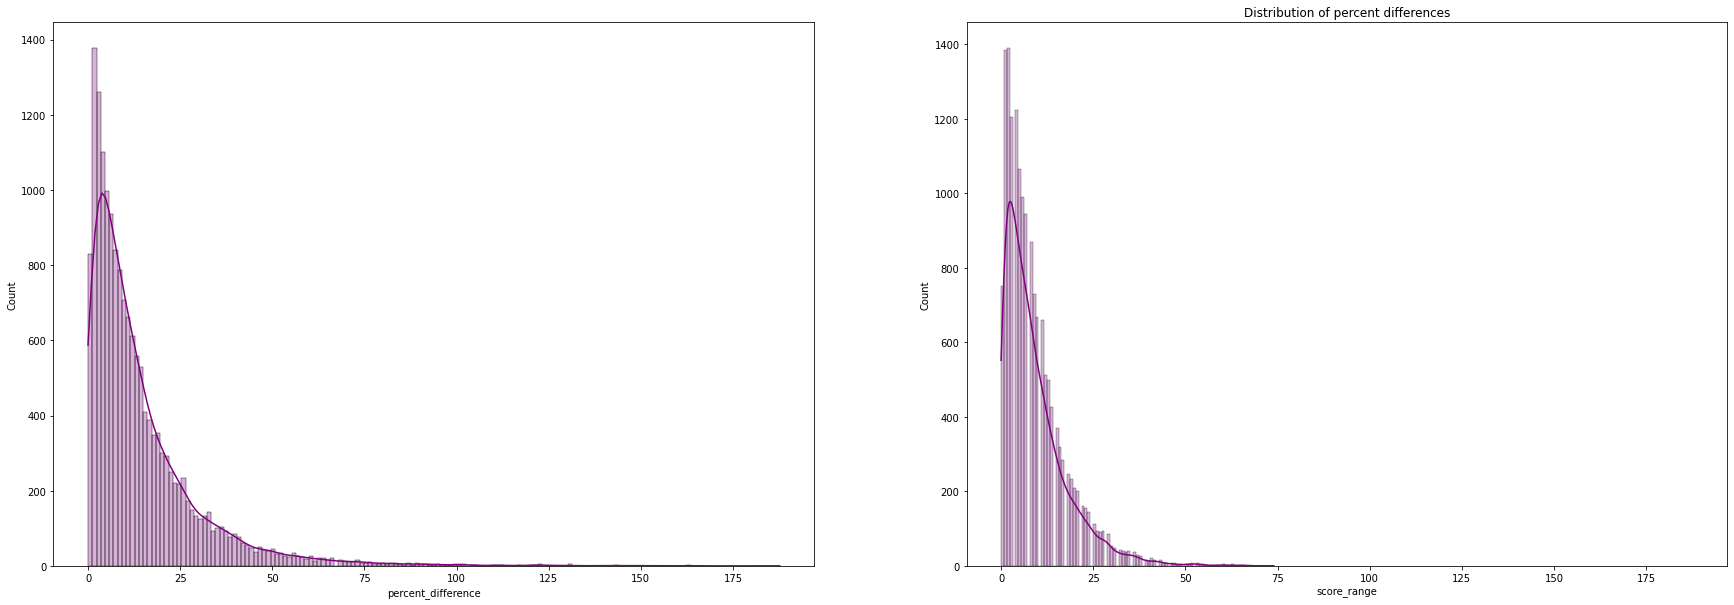

In [32]:
#seems that most games have small percent diffrences.
fig, axes = plt.subplots(1,2, sharex=True, figsize=(30,10))

sns.histplot(data=game_scores, x='percent_difference',kde=True,color='purple', alpha=0.30, ax=axes[0])
sns.histplot(data=game_scores, x='score_range',kde=True,color='purple', alpha=0.30, ax=axes[1])
plt.title('Distribution of percent differences')
plt.show()

Here, it looks like most of the values are between 0 and 25, with a big falloff as tthe perecentages get bigger, which were contributing the the huge amounts of outliers that wer shown on the boxplot.
The highest values seems to be around 2 or 3 percent, then immediatly goes downward.

The same trend also seems to happen for the range diffrence, with the highest values around 6 or 7.

### Time for binning

In this process, a separate dataframe was used for the binned values for the game scoring, in which the critic and user scores, along with the percent difference were put into different categories depending on the range of the value. This process will make it easier to analyse the data through the means of representing values as certain categories and see how they compare to each other and how they change over time.

The new dataframe, game_bins, is creating using a copy of name and year columns of the original dataframe, since these are essential for comparision.

In [33]:
game_bins= game_scores[['name','r-year']].copy()

In the next step, the games scores of critics and users were put into categories based in the score range. Metacritc has has its own categories for its scoring: Overwhelming Dislike(0 -19), Generably Unfavorable(20-49), Mixed(50-74),Generably Favorable(75-89), and Universal Acclaim(90+). The original binning was kept instead of making a new one, despite them not being equal in range. 

To accomplish this, a function was made to convert the numerical scoring and place it under a certain category for each game. The list containing all the bins were then appended to the dataframe. 

In [34]:
# binning critic and user score using metacritic own binning
def get_bins(df, col_name):
    grade_bin=list()
    
    for value in df:
        if value > 0 and value <20:
            grade_bin.append('5.Overwhelming Dislike')
        elif value >= 20 and value < 50:
            grade_bin.append('4.Generably Unfavorable')
        elif value >= 50 and value < 75:
            grade_bin.append('3.Mixed')
        elif value >=75 and value <90:
            grade_bin.append('2.Generably Favorable')
        elif value >= 90:
            grade_bin.append('1.Acclaimed')
        else:
            grade_bin.append(np.nan)
        
    game_bins[col_name] = grade_bin

get_bins(game_scores['critic score'], 'critic_bin')
get_bins(game_scores['user score'], 'user_bin')
game_bins.head()
#game_bins['critic_bin'] = pd.cut(game_scores['critic score'], bins, labels=group_names, include_lowest=True)
#game_bins['user_bin'] = pd.cut(game_scores['user score'], bins, labels=group_names, include_lowest=True)
#binning percent diffrence(has to be done custom since percentages can have huge results)

,name,r-year,critic_bin,user_bin
0,The Legend of Zelda: Ocarina of Time,1998,1.Acclaimed,1.Acclaimed
1,Tony Hawk's Pro Skater 2,2000,1.Acclaimed,3.Mixed
2,Grand Theft Auto IV,2008,1.Acclaimed,2.Generably Favorable
3,SoulCalibur,1999,1.Acclaimed,2.Generably Favorable
4,Grand Theft Auto IV,2008,1.Acclaimed,2.Generably Favorable


A similar process was done for the percent difference and the years. These were made with custom catagory ranges.

In [35]:
#bins of percent difference
percent_bin=list()

for value in game_scores['percent_difference']:
    if value >0 and value <= 10:
        percent_bin.append('Small')
    elif value > 10 and value <= 25:
        percent_bin.append('Moderate')
    elif value > 25:
        percent_bin.append('Large')
    else:
        percent_bin.append(np.nan)
        
game_bins['percent_bin'] = percent_bin
game_bins

,name,r-year,critic_bin,user_bin,percent_bin
0,The Legend of Zelda: Ocarina of Time,1998,1.Acclaimed,1.Acclaimed,Small
1,Tony Hawk's Pro Skater 2,2000,1.Acclaimed,3.Mixed,Large
2,Grand Theft Auto IV,2008,1.Acclaimed,2.Generably Favorable,Large
3,SoulCalibur,1999,1.Acclaimed,2.Generably Favorable,Moderate
4,Grand Theft Auto IV,2008,1.Acclaimed,2.Generably Favorable,Moderate
...,...,...,...,...,...
17939,Vroom in the Night Sky,2017,5.Overwhelming Dislike,4.Generably Unfavorable,Large
17940,Leisure Suit Larry: Box Office Bust,2009,5.Overwhelming Dislike,5.Overwhelming Dislike,Moderate
17941,Yaris,2007,5.Overwhelming Dislike,4.Generably Unfavorable,Large
17942,Ride to Hell: Retribution,2013,5.Overwhelming Dislike,5.Overwhelming Dislike,Moderate


In [36]:
#bins of years into 5 categories
year_bin=list()

for year in game_bins['r-year']:
    if year < 2000:
        year_bin.append('1:Late 90s')
    elif year >= 2000 and year < 2005:
        year_bin.append('2:Early 00s')
    elif year >= 2005 and year < 2010:
        year_bin.append('3: Late 00s')
    elif year >= 2010 and year < 2015:
        year_bin.append('4:Early 10s')
    else:
        year_bin.append('5:Late 10s&2020')
game_bins['year_bin'] = year_bin
game_bins.loc[game_bins['r-year'] == 2014]

,name,r-year,critic_bin,user_bin,percent_bin,year_bin
8,Grand Theft Auto V,2014,1.Acclaimed,2.Generably Favorable,Moderate,4:Early 10s
16,Grand Theft Auto V,2014,1.Acclaimed,2.Generably Favorable,Moderate,4:Early 10s
58,The Last of Us Remastered,2014,1.Acclaimed,1.Acclaimed,Small,4:Early 10s
241,Super Smash Bros. for Wii U,2014,1.Acclaimed,2.Generably Favorable,Small,4:Early 10s
268,Dark Souls II,2014,1.Acclaimed,2.Generably Favorable,Moderate,4:Early 10s
...,...,...,...,...,...,...
17862,Air Conflicts: Vietnam Ultimate Edition,2014,4.Generably Unfavorable,5.Overwhelming Dislike,Large,4:Early 10s
17878,Rambo: The Video Game,2014,4.Generably Unfavorable,4.Generably Unfavorable,Moderate,4:Early 10s
17887,Basement Crawl,2014,4.Generably Unfavorable,4.Generably Unfavorable,Small,4:Early 10s
17903,Tenkai Knights: Brave Battle,2014,4.Generably Unfavorable,4.Generably Unfavorable,Moderate,4:Early 10s


The first plot created is a pie chart of the percentage of critic scores, user scores and percent difference catagories. 

Text(0.5, 1.0, 'Percentage rating Categorical')

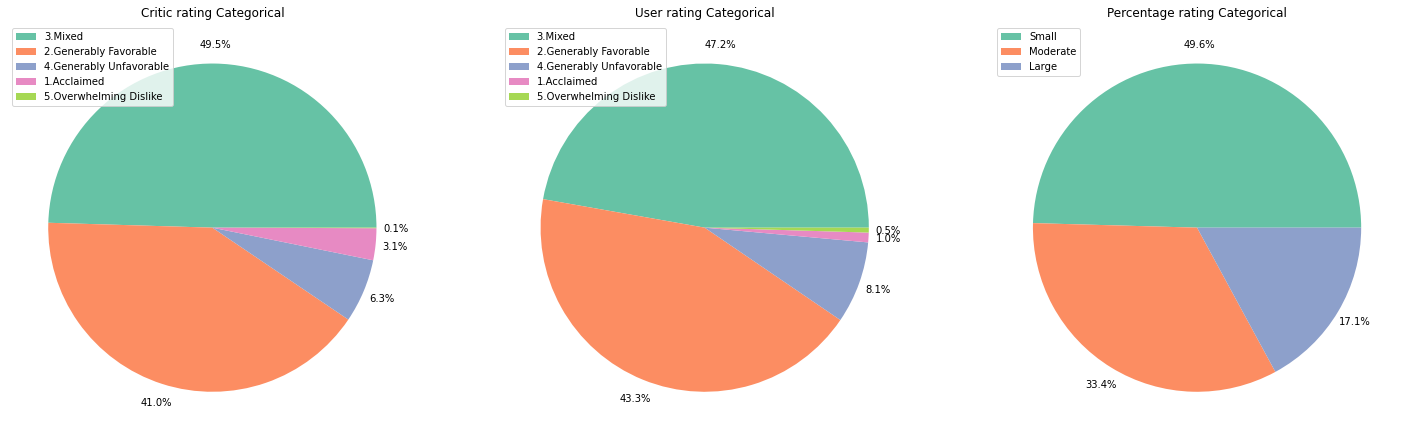

In [37]:
# bar chats(or pier chart) below
fig, (axes) = plt.subplots(1,3, figsize=(25,25))
color = sns.color_palette('Set2')
axes[0].pie(game_bins['critic_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12,colors=color)
axes[0].legend(labels=game_bins['critic_bin'].value_counts().index, loc='upper left')
axes[0].set_title('Critic rating Categorical')
axes[1].pie(game_bins['user_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12, colors=color)
axes[1].legend(labels=game_bins['user_bin'].value_counts().index, loc='upper left')
axes[1].set_title('User rating Categorical')
axes[2].pie(game_bins['percent_bin'].value_counts(), autopct='%1.1f%%', pctdistance=1.12,colors=color)
axes[2].legend(labels=game_bins['percent_bin'].value_counts().index, loc='upper left')
axes[2].set_title('Percentage rating Categorical')

Here the pie charts of the critic and user scores have small differences that are noticable, such as users scores having a higher percentage of Overwhelming disliked games and less acclaimed games then critics. Other than those diffrences, they do seem about the same with the other categories give or take. 

For percentage, it does seem that the majority of games have small differences between users and critics. However, slighly more than half have moderate and large percent differences, which could be large depending on the larger number used, as explain above. 

Bar charts are helpful to see how many times a certain value and category was used. For these next two bar charts, the count of the score categories are shown throughout each time period, from the late 90s to the late 10s into 2020. This will show the growth of the numbers over time and also make it possible to observe any notable differences.

Text(0.5, 1.0, 'Critic rating count through time periods')

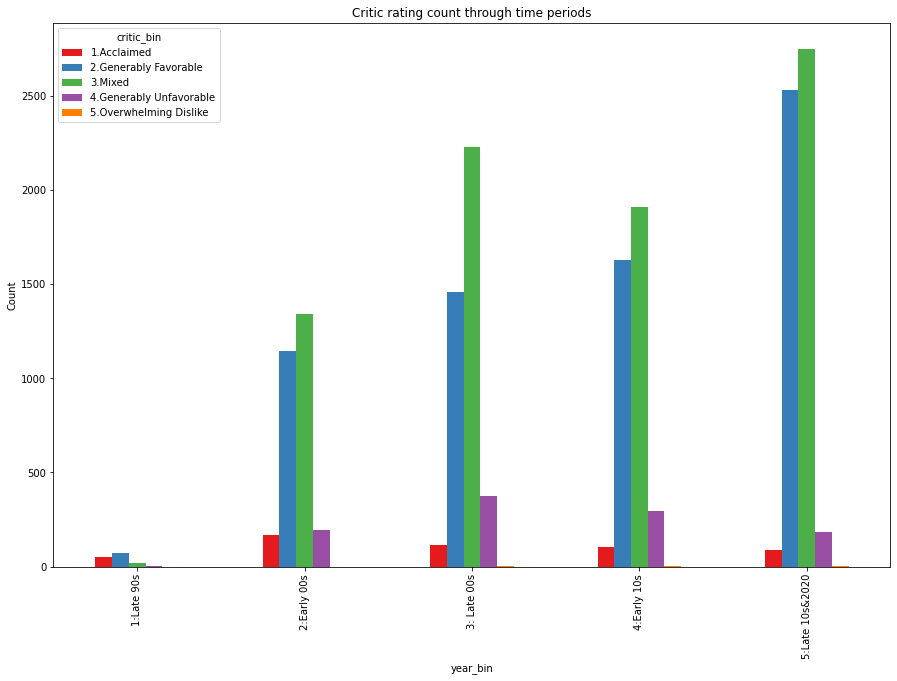

In [38]:
#bar charts of rating and percentage categories within each time period 
year_rating_c = game_bins.groupby(['year_bin','critic_bin'])['name'].count().unstack()
color= sns.color_palette('Set1')
year_rating_c.plot.bar(figsize=(15,10), color=color)
plt.ylabel('Count')
plt.title('Critic rating count through time periods')

WIth each time period, the amount of scores total increased almost each period, which shows both the amount of games that were coming out, but also the amount of reviewers that were judging these games. Besides the late 90s, all the bars look aboput the same through the periods. However, distance between generably favorable and mixed changes, with the most recent period being the closest between the two. Also, there seems to be a decrease in generable unfavorable games since the early 10s, with the other staying around the same height despite the growth.

Text(0.5, 1.0, 'User rating count through time periods')

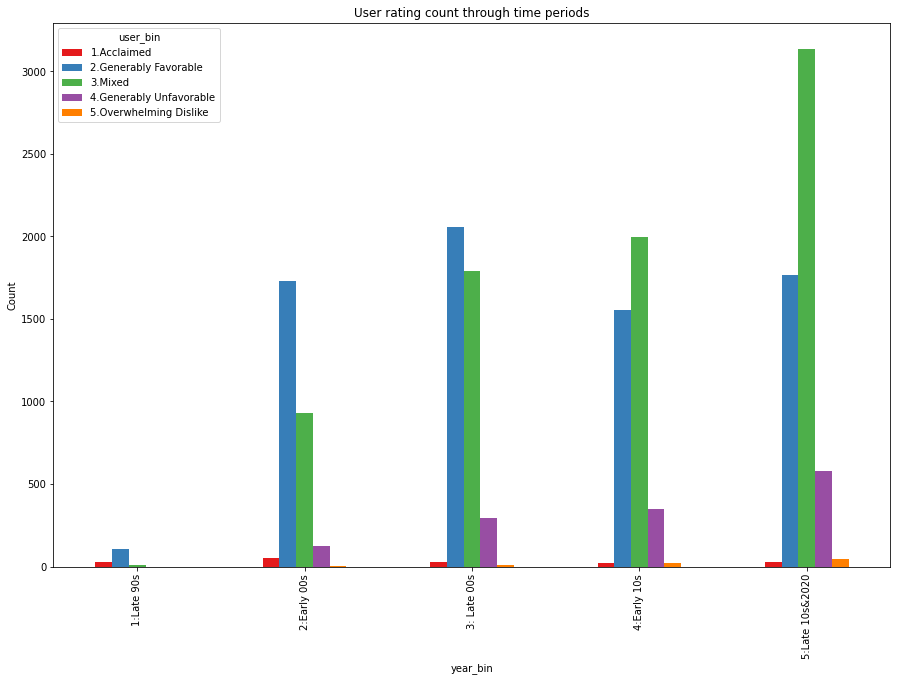

In [39]:
year_rating_u = game_bins.groupby(['year_bin','user_bin'])['name'].count().unstack()
year_rating_u.plot.bar(figsize=(15,10), color=color)
plt.ylabel('Count')
plt.title('User rating count through time periods')

Here major differences can be seen when compared to the critic scores. First of all, the diffrence between generably favorable and mixed has bee changing since the late 00s, but have been close to each other. That seems to change in the latest period as the mixed score sharply surpasses all the other scores. In adddition, the amount of games that are generably unfavorable grows too, unlike the critic scores. Already from this, it seems that the users may score a bit more harshly compared to critics, especially more recently.

Text(0.5, 1.0, 'Percent diffrence count through time periods')

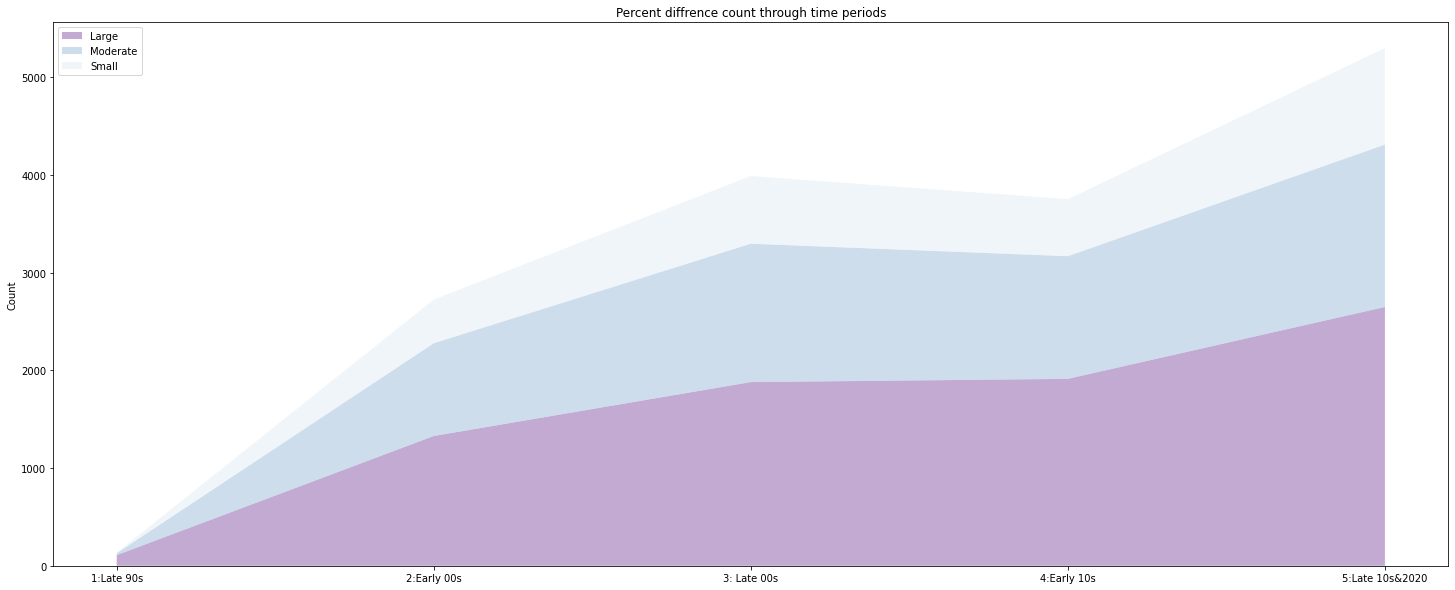

In [40]:
year_difference = game_bins.groupby(['year_bin','percent_bin'])['name'].count().unstack()
color = ['#8856a7','#9ebcda','#e0ecf4']
plt.figure(figsize=(25,10))
plt.stackplot(year_difference.index, year_difference['Small'],year_difference['Moderate'],year_difference['Large'], alpha=0.50, colors=color)
plt.ylabel('Count')
plt.legend(labels=year_difference.columns, loc='upper left')
plt.title('Percent diffrence count through time periods')

Back to the pie charts, but now its for each time period. While the bar plots were helpful in showing the count of each catergory throughout the years, the pie charts will be albe to show the percentages in relation to each time period. This will let us know the changes that has been happening between each catergory against the others. 

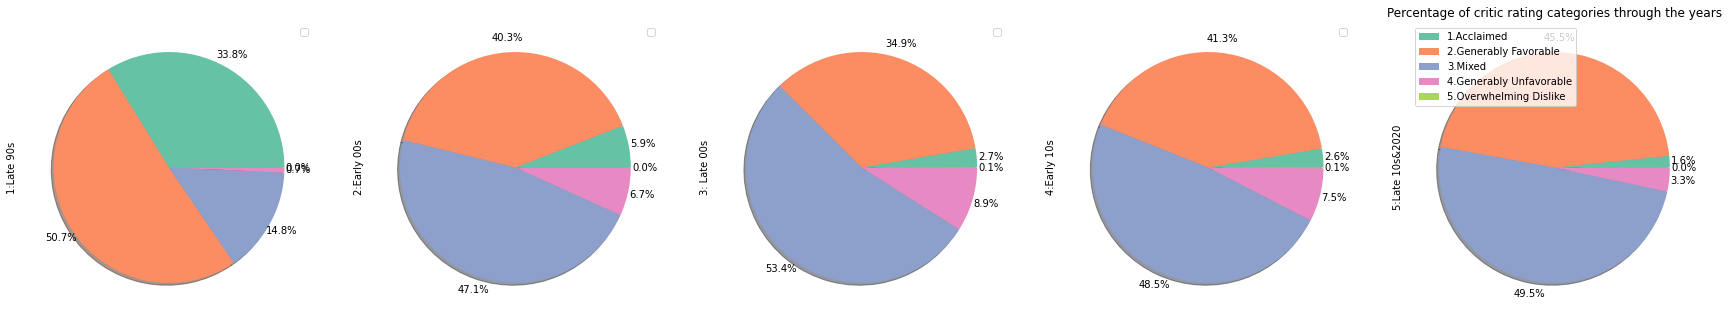

In [41]:
#pie charts of percentages of rating and percentage categories within time periods
year_rating_pieC = year_rating_c.transpose()
color = sns.color_palette('Set2')
year_rating_pieC.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, colors=color)
plt.legend(labels=year_rating_pieC.index, loc='upper left')
plt.title('Percentage of critic rating categories through the years')
plt.show()

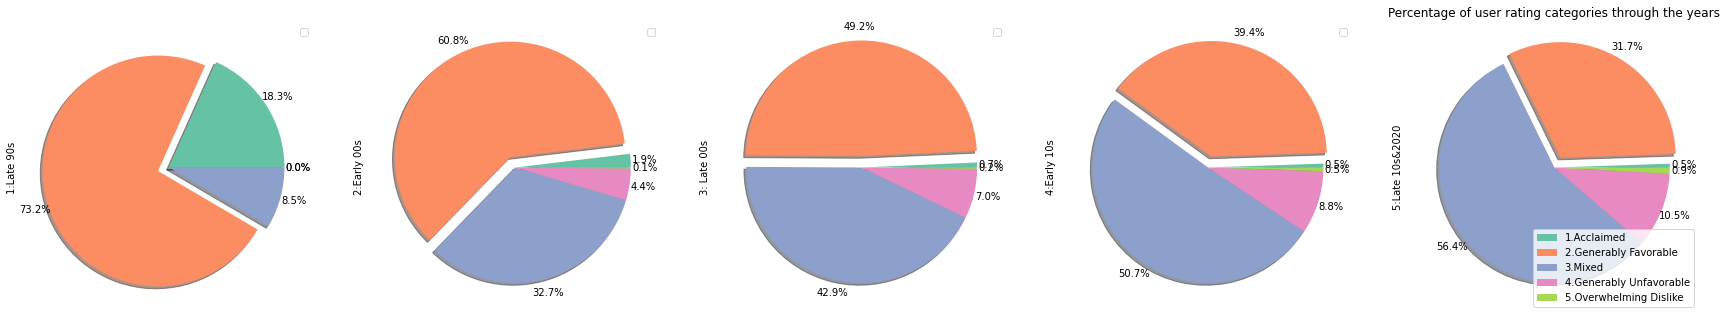

In [42]:
year_rating_pieU = year_rating_u.transpose()
explode = (0,0.1,0,0,0)
year_rating_pieU.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, explode = explode, colors=color)
plt.legend(labels=year_rating_pieU.index, loc='lower right')
plt.title('Percentage of user rating categories through the years')
plt.show()

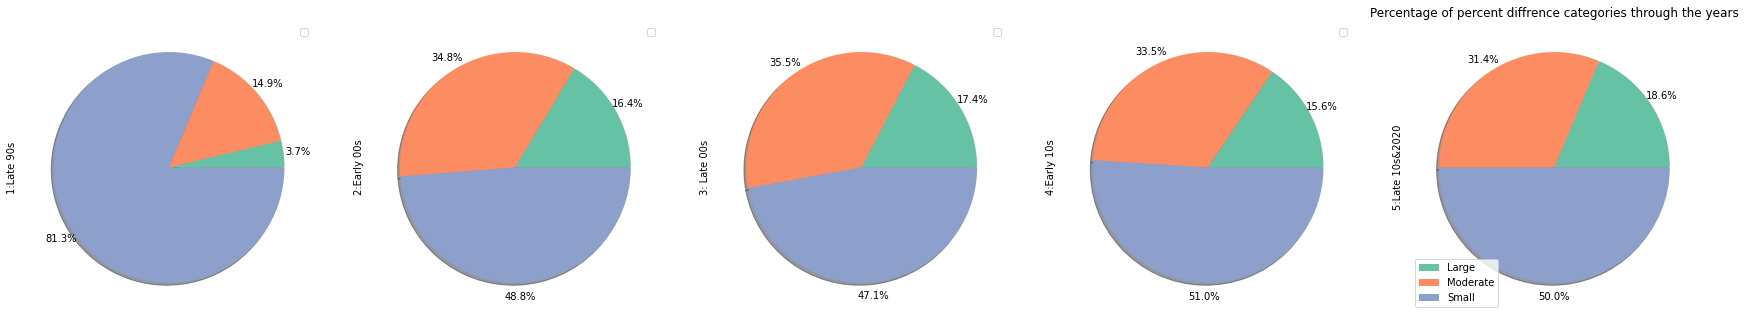

In [43]:
year_difference_pie = year_difference.transpose()
year_difference_pie.plot.pie(subplots=True, figsize=((30,40)), labels=None, shadow=True, autopct='%1.1f%%', pctdistance=1.12, colors=color)
plt.legend(labels=year_difference_pie.index, loc='lower left')
plt.title('Percentage of percent diffrence categories through the years')
plt.show()

First, the critic scores:
* Disregarding the first chart for the late 90s, there doesn't seem to be any big change in general
* The Overwhelming dislike section seems to be little to nothing, so it seems like critics don't rate games that low all that much
* Past the Early 00s, the Generably Favorable score grows every time period, and the Generably Unfavorable score decrease at the Late 10s & 2020 section

The user scores:
* Compared to the critics scores, there seems to be many differences that happens throughout the periods, especially in the Mixed score.
* Since the beginning, the Mixed scoring has been growing at every period, while Generably Favorable has been decrerasing every period also.
* Unlike the critic scoring, the Generable Unfavorale scores have been slightly increasing, every period.

The percent differences:
* Not that much differences that can be seen disregarding the the Late 90s chart
* Only slight changes between periods 

As another form of comparsion, I decided to make a matrix between critcs and user score. Specifically, I wanted to see how many times users agreed with critcs, and when they chose another score. In this matrix, critic and user scores will be compared in order to see when users choose the same score as critcs, and when they didn't what they chose differently.   

In [44]:
#creating a matrix that compares user rating with what critics rated for the same game.
match_matrix = game_bins.groupby(['critic_bin','user_bin'])['name'].count().unstack()
match_matrix.replace(np.nan, 0, inplace=True)
match_matrix

user_bin,1.Acclaimed,2.Generably Favorable,3.Mixed,4.Generably Unfavorable,5.Overwhelming Dislike
critic_bin,,,,,
1.Acclaimed,79.0,366.0,75.0,2.0,0.0
2.Generably Favorable,70.0,4334.0,2223.0,192.0,13.0
3.Mixed,10.0,2425.0,5095.0,691.0,29.0
4.Generably Unfavorable,0.0,82.0,473.0,457.0,33.0
5.Overwhelming Dislike,0.0,0.0,0.0,4.0,5.0


By looking at the chart, it seems like there are many times critics and users agree, but also times users have a diffrent opinion.
* When critics chose acclaimed, a decent amount also chose acclaimed, but more also chose Generably favorable, which isn't a huge difference away from each other in terms of scores.
* When critics chose Generably favorable, the majority of users agreed, but a good number disagreed and thought it was mixed instead.
* When critics chose Mixed, a similar even happened as Generably favorable, with the majority agreeing, but some believing it was generably favorable.
* When generable unfavorable, almost the same number of users chose generably unfavorable and Mixed
* For Overwhelming Dislike, there a similar number of the same score and generably unfavorable.



The next time I did was changing all the numbers to a percentage relative to the user scores and transformed the matrix into a heatmap.

In [45]:
#converting matrix to percentages
for i, name in enumerate(match_matrix.columns):
    match_matrix[name] = (match_matrix[name] / match_matrix[name].sum()) * 100 
match_matrix    

user_bin,1.Acclaimed,2.Generably Favorable,3.Mixed,4.Generably Unfavorable,5.Overwhelming Dislike
critic_bin,,,,,
1.Acclaimed,49.685535,5.078396,0.953471,0.148588,0.00
2.Generably Favorable,44.025157,60.135979,28.260870,14.264487,16.25
3.Mixed,6.289308,33.647842,64.772438,51.337296,36.25
4.Generably Unfavorable,0.000000,1.137783,6.013221,33.952452,41.25
5.Overwhelming Dislike,0.000000,0.000000,0.000000,0.297177,6.25


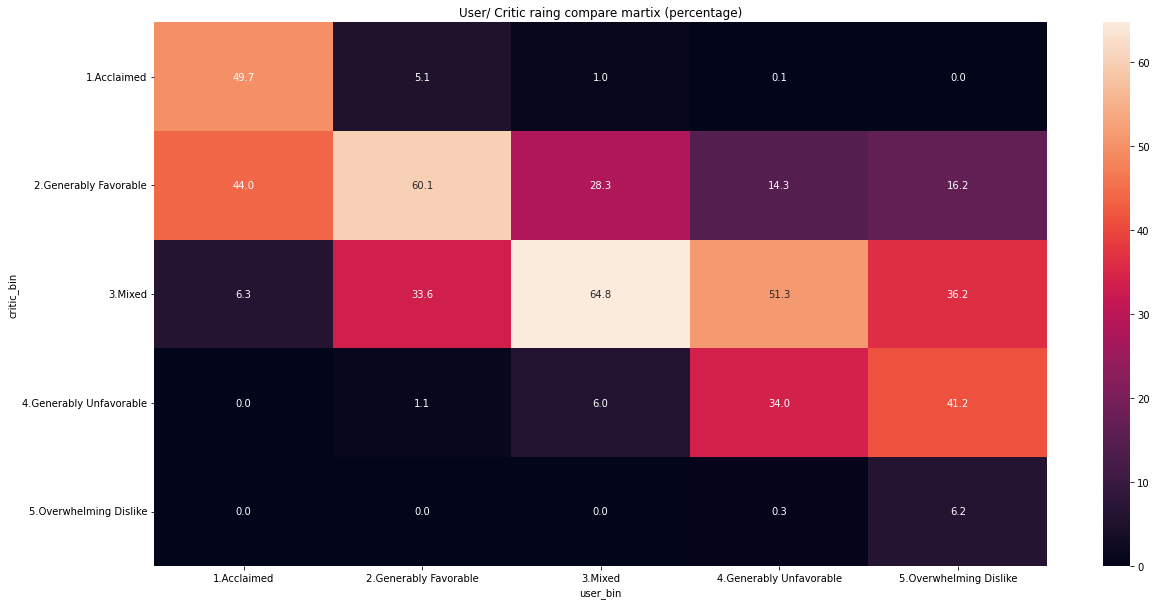

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(match_matrix, annot=True, fmt=".1f")
plt.title('User/ Critic raing compare martix (percentage)')
plt.show()

The next think I wanted to check out was, according to the amount of user ratings, which platform was more popular, or at least which one had more users that cared to review the games on it. 
After grouping the amount of users based on the platform, a horizontal bar chart was produced, one regular and another in log scale, mostly to compensate between the lowest and higherst platfoms according to amount.

In [47]:
# list of popular platforms by number of user ratings
console_best = game_scores.groupby('platform')['users amount'].sum()
console_best.sort_values(ascending=False, inplace=True)
console_best

platform
PC                 1217253
PlayStation4        762422
PlayStation3        243150
Xbox360             235943
XboxOne             149150
Switch              118772
PlayStation2         84161
3DS                  45975
Wii                  40576
WiiU                 37559
DS                   30413
PlayStationVita      22755
GameCube             21249
PlayStation          21143
PSP                  19787
Xbox                 19284
Nintendo64           15032
GameBoyAdvance       12599
Dreamcast             3412
Stadia                  41
Name: users amount, dtype: int64

Text(0.5, 1.0, 'Platform popularity according the user count (Log scale)')

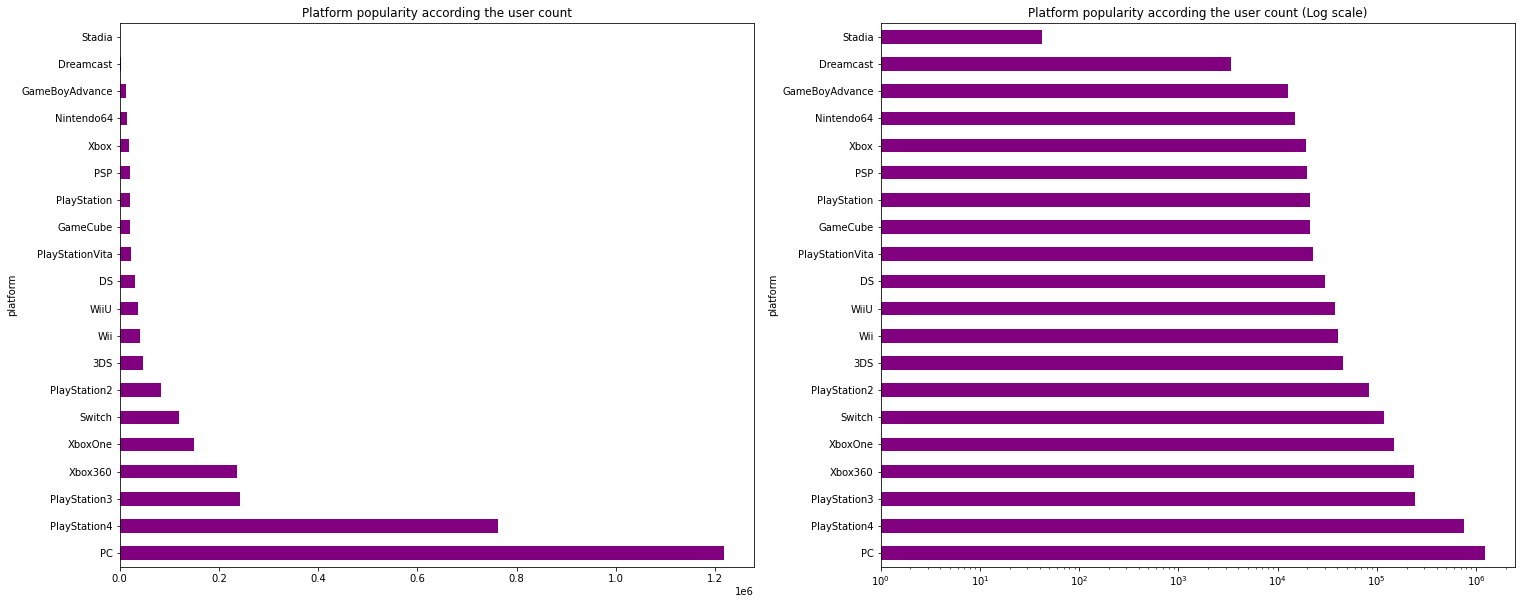

In [48]:
fig, (axes) = plt.subplots(1,2, figsize=(25,10))
console_best.plot.barh(ax=axes[0],color='purple')
axes[0].set_title('Platform popularity according the user count')
console_best.plot.barh(log=True, ax=axes[1],color='purple')
axes[1].set_title('Platform popularity according the user count (Log scale)')

Not surprisingly, PC has the most reviews, mainly due to it not being a generational platform like consoles with a new one coming out every couple of years. Behind it a far bit is the PS4, with the PS3 and Xbox 360 in second and third. Surprisingly, the XboxOne, even though it came out in the 8th generation, similar to the PS4, it recieved less user reviews then the older Xbox 360. This is even more surprising given that the Xbox One and PS4 share a lot of the same games, so it would have about the same opportuinty for users to rate them on that platform.  

Following suit, I also wanted to see the rating of differnt developers. In this section, I wanted to see the best and worst rating developers according to user and critic scores as well as developers with the highest and lowest percent difference and score range. To filter out games that had multiple developers, or developers that only worked on one or two games, I only accepted developers that have more than two entries. Afterwards, I put all the data into bar plots for easier comparision. 

In [49]:
# developer bar chart
developer_best= game_scores.groupby('developer')['critic score','user score','percent_difference','score_range'].mean()
developer_best['count'] = game_scores.groupby('developer')['name'].count()
developer_best_c = (developer_best.sort_values('critic score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_u = (developer_best.sort_values('user score', ascending=False)).loc[developer_best['count'] > 2]
developer_best_p = (developer_best.sort_values('percent_difference')).loc[developer_best['count'] > 2]
developer_best_r = (developer_best.sort_values('score_range')).loc[developer_best['count'] > 2]
developer_best_r

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference,score_range,count
developer,,,,,
GalaxyTrail,83.000000,83.000000,0.803475,0.666667,3
VertexPop,71.666667,72.666667,1.284808,1.000000,3
TerryCavanagh,81.000000,79.750000,1.545245,1.250000,4
LookingGlassStudios,88.000000,88.000000,1.490176,1.333333,3
RayarkInc.,76.666667,77.333333,1.744469,1.333333,3
...,...,...,...,...,...
SledgehammerGames,76.363636,47.090909,51.513869,29.272727,11
"EchtraGames,Inc.",65.000000,34.666667,62.612086,30.333333,3
PhoenixLabs,78.250000,46.500000,51.161954,31.750000,4


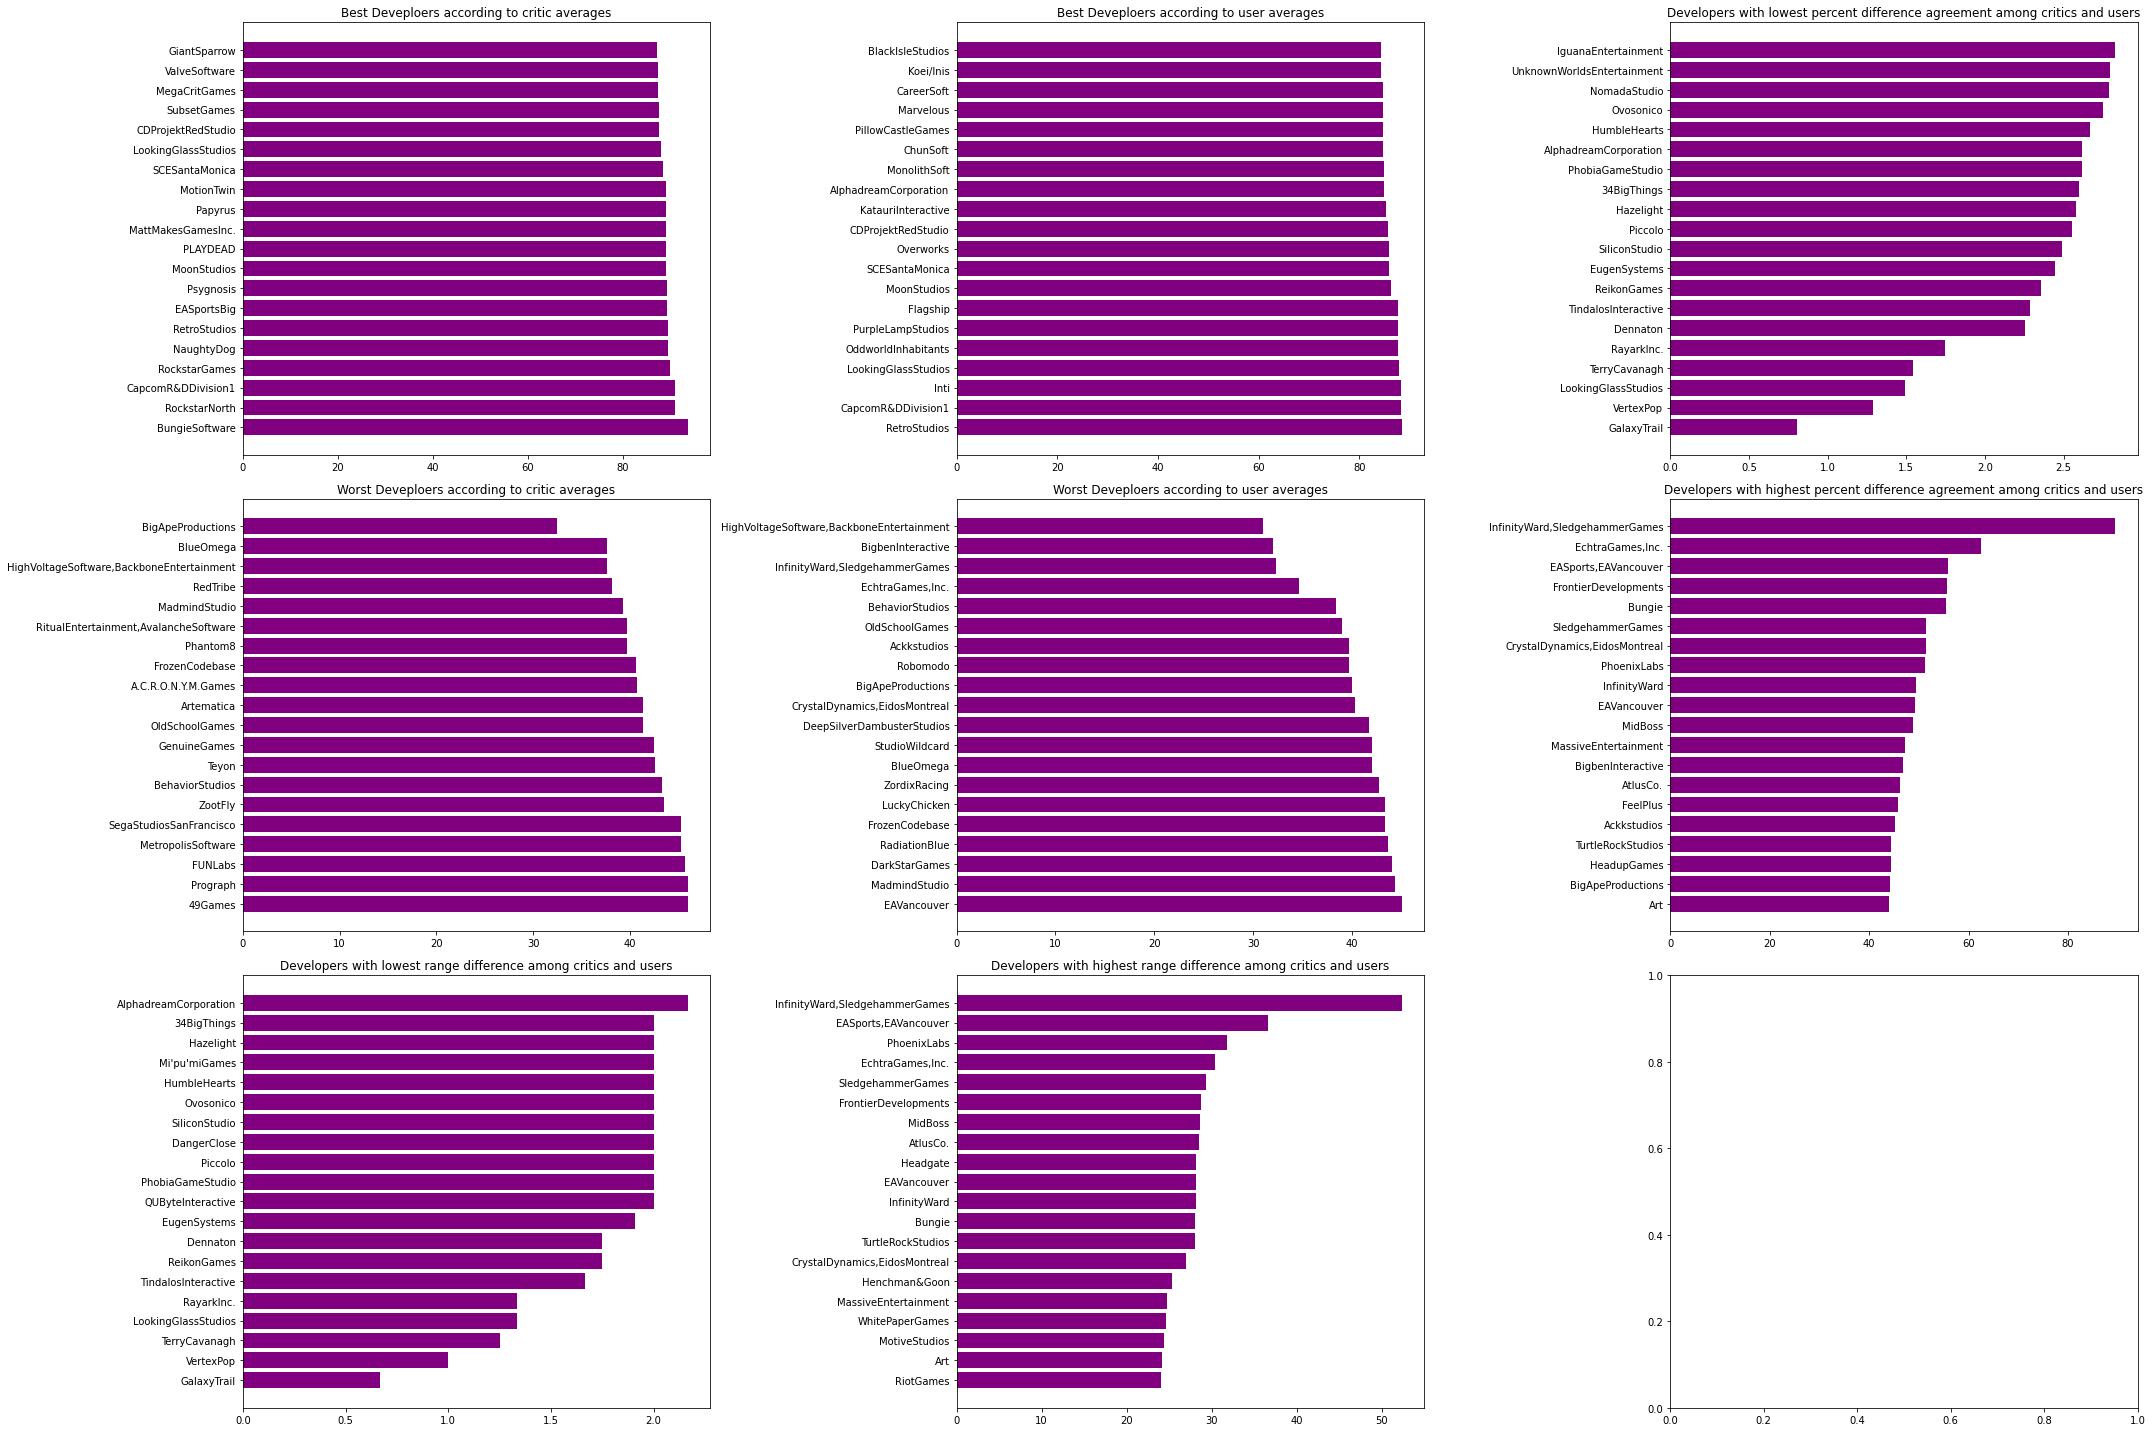

In [50]:
#best, worst, developers along with lowest and highest percent differences  
fig, axes = plt.subplots(3,3, figsize=(30,20))
axes[0,0].barh(y=developer_best_c.head(20).index, width=developer_best_c['critic score'].head(20),color='purple')
axes[0,0].set_title('Best Deveploers according to critic averages')
axes[0,1].barh(y=developer_best_u.head(20).index, width=developer_best_u['user score'].head(20),color='purple')
axes[0,1].set_title('Best Deveploers according to user averages')
axes[0,2].barh(y=developer_best_p.head(20).index, width=developer_best_p['percent_difference'].head(20),color='purple')
axes[0,2].set_title('Developers with lowest percent difference agreement among critics and users')
axes[1,0].barh(y=developer_best_c.tail(20).index, width=developer_best_c['critic score'].tail(20),color='purple')
axes[1,0].set_title('Worst Deveploers according to critic averages')
axes[1,1].barh(y=developer_best_u.tail(20).index, width=developer_best_u['user score'].tail(20),color='purple')
axes[1,1].set_title('Worst Deveploers according to user averages')
axes[1,2].barh(y=developer_best_p.tail(20).index, width=developer_best_p['percent_difference'].tail(20),color='purple')
axes[1,2].set_title('Developers with highest percent difference agreement among critics and users')
axes[2,0].barh(y=developer_best_r.head(20).index, width=developer_best_r['score_range'].head(20), color='purple')
axes[2,0].set_title('Developers with lowest range difference among critics and users')
axes[2,1].barh(y=developer_best_r.tail(20).index, width=developer_best_r['score_range'].tail(20), color='purple')
axes[2,1].set_title('Developers with highest range difference among critics and users')
fig.tight_layout()

On the first row are the results of the developers with the highest score ratings as well as the ones with the lowest percent diffrence(incluing the lowest range diffrence on the third row first chart)
* There do seem to be some developers that show up on the the user and critic top 20, such as CDProjectRed, Looking Glass Studios, SCE Santa Monica, Capcom R&D Division 1, Moon Studios and Retro Studios.
* Out of all the studios listed, only Looking Glass showed up on the top 20 lowest percent difference chart as well as the top 20 lowest range chart which means that both agree similarly that they are a good developer.

The second row contains the results of the developers with the lowest score ratings as well as the ones with the highest percent diffrence(incluing the highest range diffrence on the third row second chart)
* There do seem to be some developers that show up on both, such as Big Ape Productions, High Voltage Software alongside Back Bone Entertainment, Behavior Studios, and Old School Games. 
* The most interesting thing about the highert perecentage and range diffrence chart is looking up the developers that show up on it that were also on the lowest developer score for either user or critic.
 * In this case, some of the games on the lowest developer score for users also show up on the highest percent and range diffrence charts, such as Infinity Ward alongside Sledgehammer Games, EA Vancouver,and Crystal Dynamics alongside Eidos Montreal. 


As the final section, I wanted to see the chages over time in certain categories such as the average critic and user scores, the percent and range differnce, as well as changes in the amount of critic and users voters, and game amounts. In order to achieve this, I took the average of all thses categories by each year and made a line plot of each one to see the changes year by year.

In [51]:
#year plots 
years_avg = game_scores.groupby('r-year')['critic score','user score','percent_difference','score_range'].mean()
years_avg

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critic score,user score,percent_difference,score_range
r-year,,,,
1995,86.000000,86.000000,0.000000,0.000000
1996,85.450000,83.550000,7.159252,5.700000
1997,85.185185,84.592593,5.940481,4.888889
1998,83.186047,83.953488,5.908057,4.720930
1999,83.470588,84.764706,7.886158,6.235294
2000,73.810458,75.931373,13.238858,9.258170
2001,72.326489,75.244353,12.467120,8.507187
2002,71.318113,74.321157,13.844611,9.471842
2003,71.281806,75.466484,13.460243,9.172367


Text(0.5, 1.0, 'Score range through the years')

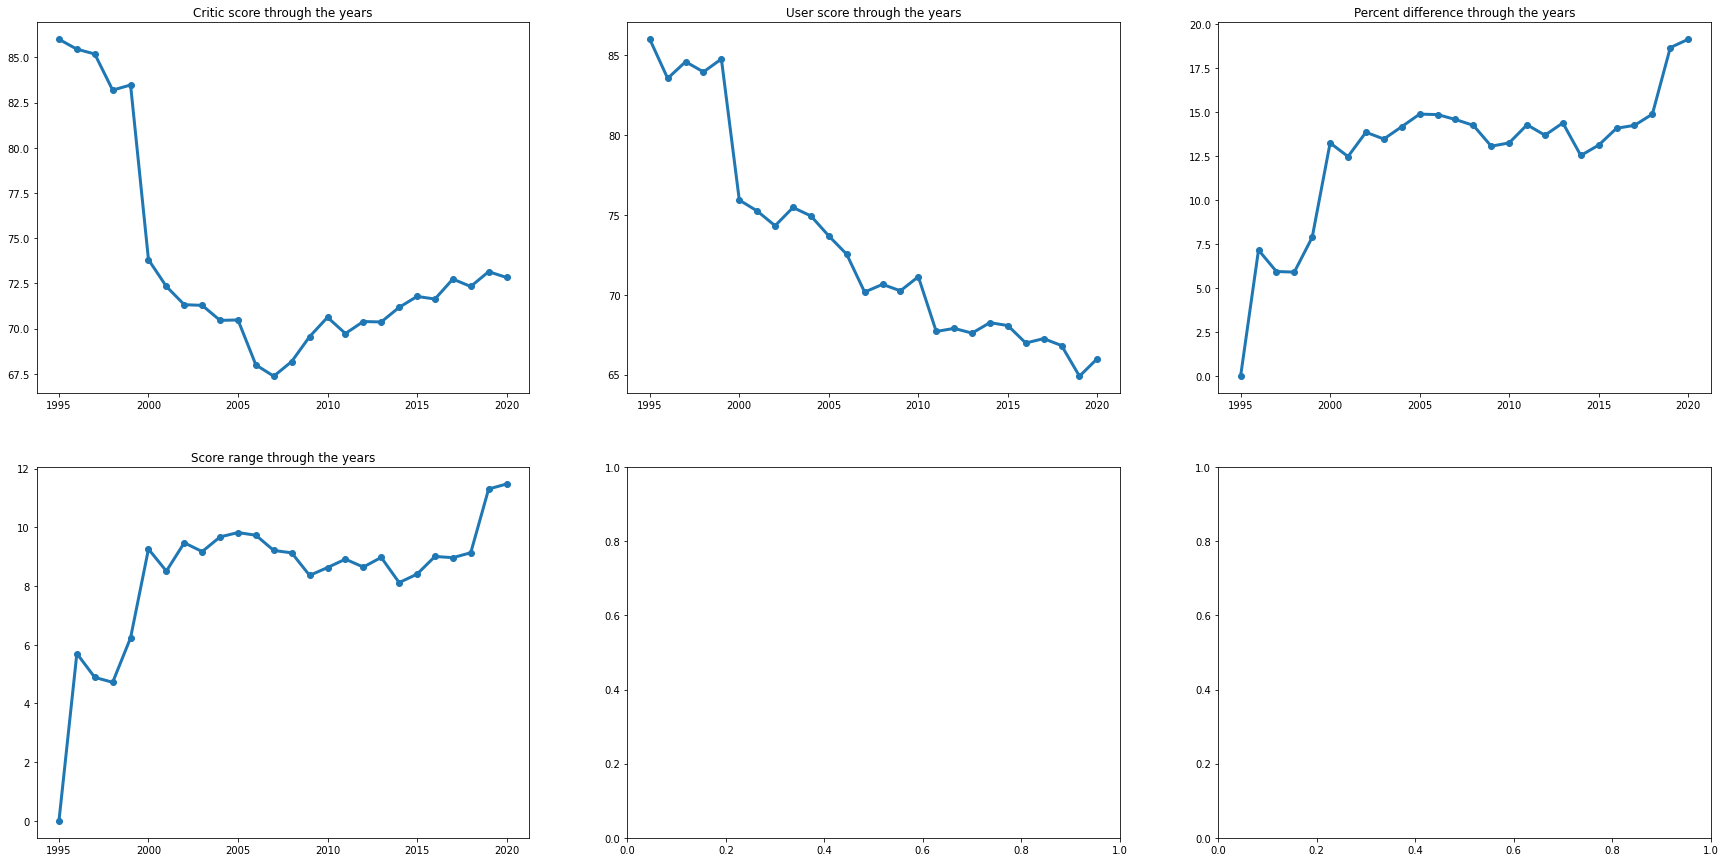

In [52]:
#critic and user score and percent difference average throughout the years
fig, axes = plt.subplots(2,3, figsize=(30,15))
axes[0][0].plot(years_avg['critic score'], linewidth = 3, marker='o')
axes[0][0].set_title('Critic score through the years')
axes[0][1].plot(years_avg['user score'], linewidth = 3, marker='o')
axes[0][1].set_title('User score through the years')
axes[0][2].plot(years_avg['percent_difference'], linewidth = 3, marker='o')
axes[0][2].set_title('Percent difference through the years')
axes[1][0].plot(years_avg['score_range'], linewidth = 3, marker='o')
axes[1][0].set_title('Score range through the years')

The first plot is the critic scores:
* From around 1999 to around 2007, critic scores were going down pretty consistenly, with 67.5 as an average.
* After that point, it has been slowly going up, reaching about 73 as an average.

The second plot are the user scores:
* Unlike the critic scores, the user scores have beem going down since the beginning, with only slight increases between years, with the lowest average being 65.

The third plot are the percent differences:
* For the first few years, it was going up a bit, but seems to stagnate between 2000 and 2015.
* Past this, the difference seems to increase, with a sharp increase between 2018 and 2019, which was when the user score got its lowest average as well as when the critic got its highest average since 2000.

The final one is the range difference:
* For the most part, it seems to be similar to the percent differnce chart, with only minor differences.

In [53]:
# critic, user and game count throughtout the years
years_count = game_scores.groupby('r-year')['critics amount','users amount'].sum()
years_count['game count'] = game_scores.groupby('r-year')['name'].count()
years_count

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,critics amount,users amount,game count
r-year,,,
1995,8,181,1
1996,187,5820,20
1997,314,7785,27
1998,582,21237,43
1999,817,10549,51
2000,4829,29165,306
2001,7654,34328,487
2002,11602,34381,657
2003,15828,47410,731


Text(0.5, 1.0, 'Game release growth')

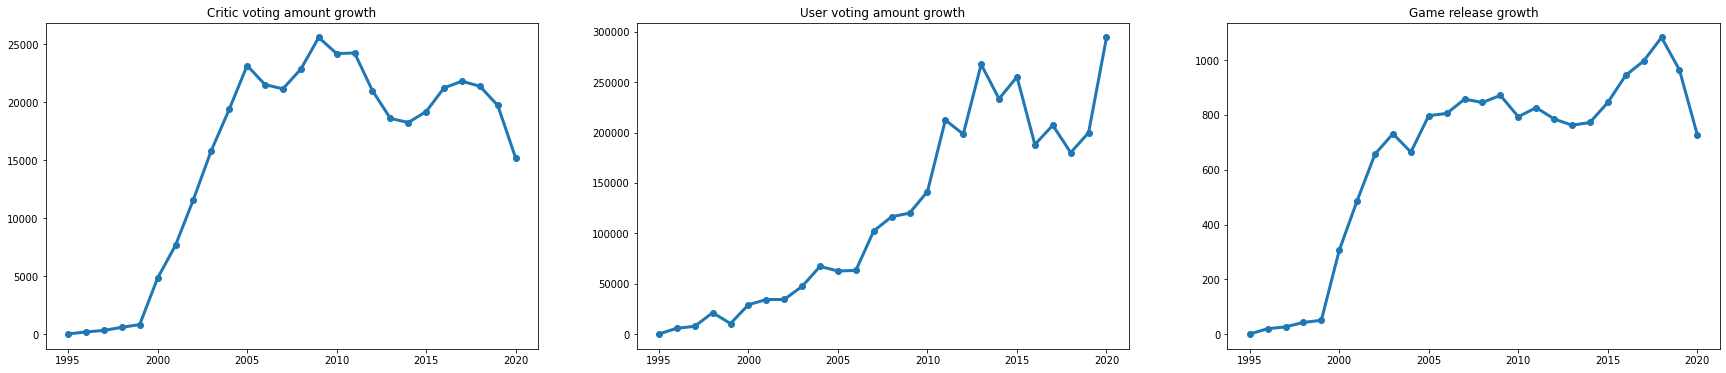

In [54]:
#critic, user, and game amount throughout the years
fig, axes = plt.subplots(1,3, sharex=True, figsize=(30,6))
axes[0].plot(years_count['critics amount'], linewidth = 3, marker='o')
axes[0].set_title('Critic voting amount growth')
axes[1].plot(years_count['users amount'], linewidth = 3, marker='o')
axes[1].set_title('User voting amount growth')
axes[2].plot(years_count['game count'], linewidth = 3, marker='o')
axes[2].set_title('Game release growth')

The first chart is the critic voting amount:
* Starting at 1999, the amount seems to increase at a sharp but consistent rate, but seems to fluctuate a bit past 2005.
* After this point, the amount goes up and down, with the latest decrease starting at 2017.

The second chart is the user voting amount:
* From the beginning until 2011, the amount has been increasing, which some fluctuations after that point.
* Interestingly, starting at 2012, around the times where the critics amount increases, the users decreases and vice versa. This is most evident at the 2018 mark.

The third is the game release amount:
* From the beginning until 1999, the releases seem the slowly increase until 2000, where the increase is sharper until 2003, where it starts to stagnate at around 800-900. 
* The amount reaches its peak at over 1000, and then starts decreasing, with a sharp one between 2019 and 2020.

To guess why at 2020 the critics amount and games releases see sharp declines while a sharp increase happens in user amount, it may be due to the Covid pandemic, which did result in many companies slowing down due to sudden change in the work envionment. This whould also result in many people staying at home and thus have more time to play games and rate those games.